**Group members:**

**Christopher Henson: cgh966**

**Rawini Dias: rwd635**


# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

In [121]:
%matplotlib inline
import matplotlib.pylab as plt

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [122]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


In [123]:
#MLP Regression models for (b)
from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')

In [124]:
#some useful code for plotting
# ax.plot(x_test, y_pred, 'blue', marker='o', )
# ax.plot(x_all, y_all, 'g')

## Answer
(a)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

In [126]:
train_reg = lin_reg.fit(x_train, y_train)
mean_squared_error(y_test, train_reg.predict(x_test))

1204.2491913174892

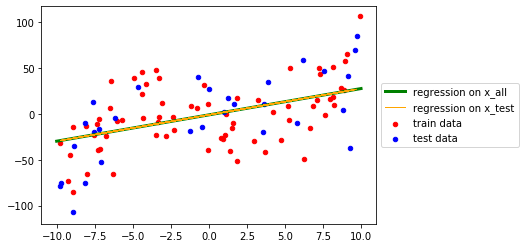

In [127]:
plt.scatter(x_train, y_train, color = 'red', label = 'train data', s = 20)
plt.scatter(x_test, y_test, color = 'blue', label = 'test data', s = 20)
plt.plot(x_all, train_reg.predict(x_all), linewidth = 3, color = 'green', label = 'regression on x_all')
plt.plot(x_test, train_reg.predict(x_test), linewidth = 1, color = 'orange', label = 'regression on x_test')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

(b)

In [128]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree = 2)
poly3 = PolynomialFeatures(degree = 3)
poly4 = PolynomialFeatures(degree = 4)

C:\Users\rawin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rawin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rawin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rawin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and

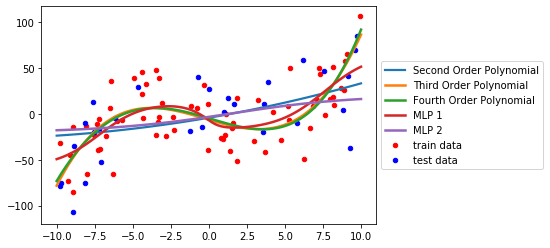

In [129]:
plt.scatter(x_train, y_train, color = 'red', label = 'train data', s = 20)
plt.scatter(x_test, y_test, color = 'blue', label = 'test data', s = 20)

#Second Order Polynomial
x_poly2 = poly2.fit_transform(x_train)
poly2.fit(x_poly2, y_train)
lin_reg.fit(x_poly2, y_train)

poly2_train_mse = mean_squared_error(y_train, lin_reg.predict(poly2.fit_transform(x_train)))
poly2_test_mse =  mean_squared_error(y_test,  lin_reg.predict(poly2.fit_transform(x_test )))

plt.plot(x_all, 
         lin_reg.predict(poly2.fit_transform(x_all)), 
         linewidth = 2.2,
         label = 'Second Order Polynomial')


#Third Order Polynomial
x_poly3 = poly3.fit_transform(x_train)
poly3.fit(x_poly3, y_train)
lin_reg.fit(x_poly3, y_train)

plt.plot(x_all, 
         lin_reg.predict(poly3.fit_transform(x_all)), 
         linewidth = 2.5,
         label = 'Third Order Polynomial')

poly3_train_mse = mean_squared_error(y_train, lin_reg.predict(poly3.fit_transform(x_train)))
poly3_test_mse =  mean_squared_error(y_test,  lin_reg.predict(poly3.fit_transform(x_test )))

#Fourth Order Polynomial
x_poly4 = poly4.fit_transform(x_train)
poly4.fit(x_poly4, y_train)
lin_reg.fit(x_poly4, y_train)

plt.plot(x_all, 
         lin_reg.predict(poly4.fit_transform(x_all)), 
         linewidth = 2.5,
         label = 'Fourth Order Polynomial')

poly4_train_mse = mean_squared_error(y_train, lin_reg.predict(poly4.fit_transform(x_train)))
poly4_test_mse =  mean_squared_error(y_test,  lin_reg.predict(poly4.fit_transform(x_test )))

#MLP 1
mlp_1_fit = mlp_1.fit(x_train, y_train)
plt.plot(x_all, 
         mlp_1_fit.predict(x_all), 
         linewidth = 2.5,
         label = 'MLP 1')

mlp_1_train_mse = mean_squared_error(y_train, mlp_1_fit.predict(x_train))
mlp_1_test_mse  = mean_squared_error(y_test, mlp_1_fit.predict(x_test  ))

#MLP 2
mlp_2_fit = mlp_2.fit(x_train, y_train)
plt.plot(x_all, 
         mlp_2_fit.predict(x_all), 
         linewidth = 2.5,
         label = 'MLP 2')

mlp_2_train_mse = mean_squared_error(y_train, mlp_2_fit.predict(x_train))
mlp_2_test_mse  = mean_squared_error(y_test, mlp_2_fit.predict(x_test  ))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [130]:
print('Second Order Polynomial Train MSE =', poly2_train_mse)
print('Second Order Polynomial Test MSE =', poly2_test_mse, '\n')

print('Third Order Polynomial Train MSE =', poly3_train_mse)
print('Third Order Polynomial Test MSE =', poly3_test_mse, '\n')

print('Fourth Order Polynomial Train MSE =', poly4_train_mse)
print('Fourth Order Polynomial Test MSE =', poly4_test_mse, '\n')

print('MLP 1 Train MSE =', mlp_1_train_mse)
print('MLP 1 Test MSE =', mlp_1_test_mse, '\n')

print('MLP 2 Train MSE =', mlp_2_train_mse)
print('MLP 2 Test MSE =', mlp_2_test_mse, '\n')

Second Order Polynomial Train MSE = 959.5190206385591
Second Order Polynomial Test MSE = 1276.3920769678755 

Third Order Polynomial Train MSE = 624.5354778268198
Third Order Polynomial Test MSE = 1152.28399170982 

Fourth Order Polynomial Train MSE = 622.4127493286283
Fourth Order Polynomial Test MSE = 1183.1992247368405 

MLP 1 Train MSE = 647.2281468179249
MLP 1 Test MSE = 1098.819661549591 

MLP 2 Train MSE = 1029.3514306571046
MLP 2 Test MSE = 1442.660019846679 



(c) 

Answer:

It appears that both the third and fourth order polynomials had very similiar fits that matched the shape of the data. With the bias-variance tradeoff in mind, it seems likely that the fourth order polynomial is overfitting our data since it has a lower train MSE but a higher test MSE compared to the third order polynomial. Therefore, the third order polynomial performed the best from the polynomial fits attempted.

Overall, considering all the fits attempted above, MLP 1 has the lowest test MSE from all the fitted curves, even though its train MSE is slightly higher than both the third and fourth order polynomials. Therefore, from an out of sample measure of error, MLP 1 has the best performance.

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


In [131]:
#some useful code
# w_true = np.arange(10)+1
# x = np.random.uniform(size=(n, 10))
# e = np.random.normal(size=(n))


#for (30)
#use - 
#for num_data_points in range(20, 1001):

#for 5) the following code is useful:
# w_true_3 = w_true[0:3]
# x_3_dimensional = np.random.uniform(size=(n, 3))

1.

In [132]:
w_true = np.arange(10)+1

In [133]:
n = 100
x_train = np.random.uniform(size=(n, 10))
e = np.random.normal(size=(n))

In [134]:
y_train = np.matmul(x_train, w_true) + e

In [135]:
len(x_train)

100

2.

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

In [137]:
train_reg = lin_reg.fit(x_train, y_train)
mean_squared_error(y_train, train_reg.predict(x_train))

0.8251407849539479

3.

In [138]:
n = 50
x_test = np.random.uniform(size=(n, 10))
e = np.random.normal(size=(n))

y_test = np.matmul(x_test, w_true) + e

In [139]:
len(y_test)

50

In [140]:
d = []

for n in range(20, 1001):
    x_train = np.random.uniform(size=(n, 10))
    e = np.random.normal(size=(n))
    
    y_train = np.matmul(x_train, w_true) + e
    
    train_reg = lin_reg.fit(x_train, y_train)
    
    mse = mean_squared_error(y_test, train_reg.predict(x_test))
    weights = train_reg.coef_
    
    d.append({'N': n,
              'MSE': mse,
              'Coefficients':weights})

In [141]:
import pandas as pd

regressions = pd.DataFrame(d).set_index('N')

In [142]:
regressions[['w1',
             'w2',
             'w3',
             'w4',
             'w5',
             'w6',
             'w7',
             'w8',
             'w9',
             'w10']] = pd.DataFrame(regressions.Coefficients.values.tolist(),
                                    index = regressions.index)

regressions = regressions.drop(['Coefficients'], axis = 1)

In [143]:
regressions

,MSE,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
N,,,,,,,,,,,
20,0.984306,0.648054,1.428383,3.462971,3.613601,3.600229,5.182351,7.890764,8.037168,10.044406,9.313203
21,2.205279,1.117400,1.071031,4.363851,1.834046,5.968922,7.809559,7.255371,7.668806,8.220328,10.626333
22,0.891088,1.740505,2.941326,3.239622,3.990056,4.614887,6.224370,6.845841,7.744682,9.655284,9.835566
23,1.634161,-0.714735,3.948772,2.847738,4.187850,5.295412,4.772984,6.246857,8.508710,8.660316,7.647209
24,0.850565,0.715465,0.910002,2.864969,5.041446,5.110675,6.218542,6.494253,8.505561,8.368969,10.526452
25,0.880369,1.098360,2.099278,3.675979,4.414613,4.623322,6.616318,6.559356,7.754391,8.635670,8.595190
26,1.275076,0.721634,2.550748,2.731367,3.867481,6.507864,5.824033,5.275981,7.704989,8.307819,10.504318
27,1.345232,1.226059,2.740449,2.876240,4.880000,3.828304,6.368494,7.555288,7.985713,10.148803,8.886407
28,1.049325,0.087069,3.072229,1.604856,3.228470,5.213836,4.792935,6.763547,6.927421,9.114253,8.961546


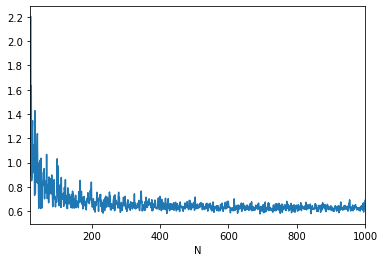

In [144]:
regressions['MSE'].plot()
plt.show()

In [145]:
mse_min = regressions['MSE'].min()

In [146]:
regressions[regressions['MSE'] == mse_min]

,MSE,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
N,,,,,,,,,,,
693,0.577081,0.628586,1.921163,2.812463,3.992555,5.055089,5.784903,7.042865,7.864281,8.939408,9.796605


4. 

In [147]:
n10_list = []

for trial in range(10):
    n = 2
    mse_coef = True

    while(mse_coef >= .01):
        x_train = np.random.uniform(size=(n, 10))
        e = np.random.normal(size=(n))
        y_train = np.matmul(x_train, w_true) + e

        train_reg = lin_reg.fit(x_train, y_train)
        weights = train_reg.coef_

        d = {'Coef':weights, 'True Coef':w_true}
        frame = pd.DataFrame(d)
        frame['diff'] = (frame['Coef'] - frame['True Coef'])**2

        mse_coef = frame['diff'].sum()/10

        n = n + 1
        
    n10_list.append(n-1)
    
    print('Trial', trial+1, ':', n-1, 'points')

Trial 1 : 367 points
Trial 2 : 334 points
Trial 3 : 353 points
Trial 4 : 355 points
Trial 5 : 423 points
Trial 6 : 286 points
Trial 7 : 410 points
Trial 8 : 369 points
Trial 9 : 336 points
Trial 10 : 248 points


In [148]:
from statistics import mean

print('Average number of data points:',mean(n10_list))

Average number of data points: 348.1


In [149]:
w_true_3 = np.arange(3)+1

n3_list = []

for trial in range(10):
    n = 2
    mse_coef = True

    while(mse_coef >= .01):
        x_train = np.random.uniform(size=(n, 3))
        e = np.random.normal(size=(n))
        y_train = np.matmul(x_train, w_true_3) + e

        train_reg = lin_reg.fit(x_train, y_train)
        weights = train_reg.coef_

        d = {'Coef':weights, 'True Coef':w_true_3}
        frame = pd.DataFrame(d)
        frame['diff'] = (frame['Coef'] - frame['True Coef'])**2

        mse_coef = frame['diff'].sum()/3
        
        n = n + 1
        
    n3_list.append(n-1)
    
    print('Trial', trial+1, ':', n-1, 'points')

Trial 1 : 65 points
Trial 2 : 45 points
Trial 3 : 161 points
Trial 4 : 28 points
Trial 5 : 35 points
Trial 6 : 29 points
Trial 7 : 23 points
Trial 8 : 79 points
Trial 9 : 84 points
Trial 10 : 52 points


In [150]:
print('Average number of data points:',mean(n3_list))

Average number of data points: 60.1


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

# X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
# Y = dataset['ViolentCrimesPerPop']

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)


Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


### Answer

**Method 1:**

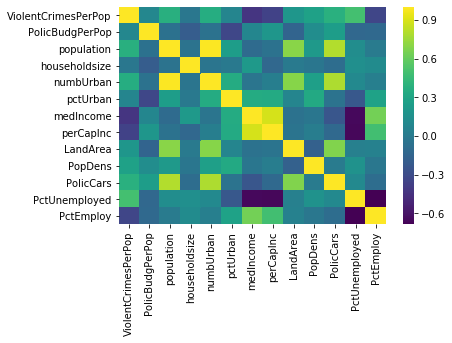

In [196]:
import seaborn as sns

corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, cmap='viridis')

Based on the correlation plot, 'population' and 'numbUrban' seem to be highly correlated.

In [197]:
dataset['population'].corr(dataset['numbUrban'])

0.992792107341272

Therefore, we will remove the numbUrban column to eliminate this collinearity.

In [198]:
df1 = dataset.drop(['numbUrban'], axis=1)

Only about 5% of rows with missing 'PctUnemployed' and 'PctEmployed' AND the rows with missing values in these two columns coincide. Therefore, it makes sense to drop the rows with missing values in these columns.

In [199]:
df1.dropna(subset=['PctUnemployed'], inplace = True)

'householdsize' is a column where we can replace the missing values with the mean household size.

In [200]:
df1['householdsize'].describe()

count    1520.000000
mean        0.462007
std         0.162186
min         0.000000
25%         0.350000
50%         0.440000
75%         0.540000
max         1.000000
Name: householdsize, dtype: float64

In [201]:
df1['householdsize'].fillna((df1['householdsize'].mean()), inplace=True)

'PolicBudPerPop' and 'PolicCars' has almost 84% of missing values which is too many to replace with an approximation or remove corresponding rows. Therefore, we will drop those two columns entirely.

In [202]:
df1.drop(['PolicBudgPerPop','PolicCars'], axis=1, inplace=True)

The population column has 10% of missing values. We will impute the missing values using linear regression.

In [203]:
df1.columns

Index(['ViolentCrimesPerPop', 'population', 'householdsize', 'pctUrban',
       'medIncome', 'perCapInc', 'LandArea', 'PopDens', 'PctUnemployed',
       'PctEmploy'],
      dtype='object')

In [204]:
xpop_train = df1[df1['population'].notnull()][['householdsize',
       'pctUrban', 'medIncome', 'perCapInc', 'LandArea', 'PopDens','PctUnemployed',
       'PctEmploy']]

ypop_train = df1[df1['population'].notnull()]['population']

In [205]:
regressor = linear_model.LinearRegression() 
model = regressor.fit(xpop_train, ypop_train)

In [206]:
coeff_df = pd.DataFrame(regressor.coef_,xpop_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
householdsize,0.009331
pctUrban,0.029575
medIncome,-0.129965
perCapInc,0.087629
LandArea,0.826019
PopDens,0.188061
PctUnemployed,0.036772
PctEmploy,0.037350


In [207]:
df1['population']= df1.apply(
    lambda row: 
    
            0.010971*row.householdsize + 0.029866*row.pctUrban - 0.126178*row.medIncome +
            0.085006*row.perCapInc + 0.826784*row.LandArea + 0.185754*row.PopDens +
            0.040536*row.PctUnemployed + 0.041137*row.PctEmploy
    
            if np.isnan(row.population) else row.population, axis=1)

In [208]:
print(df1.isnull().sum()/len(df1)*100)

ViolentCrimesPerPop    0.0
population             0.0
householdsize          0.0
pctUrban               0.0
medIncome              0.0
perCapInc              0.0
LandArea               0.0
PopDens                0.0
PctUnemployed          0.0
PctEmploy              0.0
dtype: float64


In [209]:
X1 = df1.drop(['ViolentCrimesPerPop'],axis=1)
Y1 = df1['ViolentCrimesPerPop']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size = 0.30, random_state=11)

In [210]:
#Method 1 
lm_m1 = linear_model.LinearRegression()
lm_m1.fit(X1_train,Y1_train)
lm_m1_preds = lm_m1.predict(X1_test)
print('Method 1 MAE on test data:', mean_absolute_error(Y1_test, lm_m1_preds))

Method 1 MAE on test data: 0.1291001873548599


**Method 2:**

For Method 2, we will follow the same strategies for dealing with missing data in columns 'PctUnemployed', 'PctEmploy', and 'householdsize', and make the following changes: 
1) instead of deleting the columns 'numbUrban', 'PolicBudgPerPop' and 'PolicCars', we will replace the rows with missing values with a 0.
2) instead of using regression to estimate the missing values in the population column, we will fill the missing values in the 'population' column using its mode value (not mean because that column is not normally distributed).

In [211]:
df2 = dataset.dropna(subset=['PctUnemployed'])
df2['householdsize'].fillna((df2['householdsize'].mean()), inplace=True)
df2['numbUrban'].fillna(0, inplace=True)

C:\Users\rawin\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


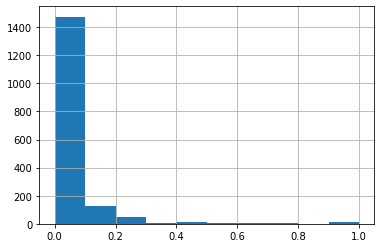

In [212]:
df2['population'].hist()

In [213]:
df2['population'].mode()

0    0.01
dtype: float64

In [214]:
df2['population'].fillna(0.01, inplace=True)

In [215]:
df2['PolicBudgPerPop'].fillna(0, inplace=True)
df2['PolicCars'].fillna(0, inplace=True)

In [216]:
print(df2.isnull().sum()/len(df2)*100)

ViolentCrimesPerPop    0.0
PolicBudgPerPop        0.0
population             0.0
householdsize          0.0
numbUrban              0.0
pctUrban               0.0
medIncome              0.0
perCapInc              0.0
LandArea               0.0
PopDens                0.0
PolicCars              0.0
PctUnemployed          0.0
PctEmploy              0.0
dtype: float64


In [217]:
X2 = df2.drop(['ViolentCrimesPerPop'],axis=1)
Y2 = df2['ViolentCrimesPerPop']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size = 0.30, random_state=11)

In [218]:
#Method 2
lm_m2 = linear_model.LinearRegression()
lm_m2.fit(X2_train,Y2_train)
lm_m2_preds = lm_m2.predict(X2_test)
print('Method 2 MAE on test data:', mean_absolute_error(Y2_test, lm_m2_preds))

Method 2 MAE on test data: 0.1284611987231491


The MAEs obtained from the two different methods are not too different.However, Method 2 has a slightly better MAE. 

The combined effect of imputing the missing values in the 'population' column with its mode instead of predicting the missing population values using regression, and replacing the missing values in the 'numbUrban', 'PolicBudgPerPop', and 'PolicCars' columns with 0 instead of deleting those columns seem to yield a slightly better MAE.

**Method 3:**

Keeping all steps the same as Method 2, but instead of filling in missing values in the 'PolicBudgPerPop' and 'PolicCars' columns with 0, we will drop them entirely.

In [222]:
df3 = dataset.dropna(subset=['PctUnemployed'])
df3['householdsize'].fillna((df3['householdsize'].mean()), inplace=True)
df3['population'].fillna(0.01, inplace=True)
df3['numbUrban'].fillna(0, inplace=True)
df3.drop(['PolicBudgPerPop','PolicCars'], axis=1, inplace=True)

C:\Users\rawin\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\rawin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [223]:
X3 = df3.drop(['ViolentCrimesPerPop'],axis=1)
Y3 = df3['ViolentCrimesPerPop']

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3,test_size = 0.30, random_state=11)

In [224]:
#Method 3
lm_m3 = linear_model.LinearRegression()
lm_m3.fit(X3_train,Y3_train)
lm_m3_preds = lm_m3.predict(X3_test)
print('Method 2 MAE on test data:', mean_absolute_error(Y3_test, lm_m3_preds))

Method 2 MAE on test data: 0.12983174142885956


We can see that MAE increased in Method 3 compared to Method 2. Therefore, we can conclude that even though the 'PolicBudgPerPop' and 'PolicCars' columns have 84% of missing values, the 16% of present values are important to the model. Therefore, we can conclude that these 2 columns are useful and should not be dropped.

# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer:

False

PCA draws no relationship between $\textbf{X}$, our matrix of features, and our output variable, $\textbf{Y}$, as it is an unsupervised method. It instead is a (orthogonal) linear transformation where each successive coordinate is in order of greatest variance.

Specifically if we have data that has been centered and scaled:

$$
\textbf{X} = 
\begin{bmatrix} 
x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,p}\\
x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,p}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{n,1} & x_{n,2} & x_{n,3} & \dots & x_{n,p} \\
\end{bmatrix}
$$

and weights given by:

$$
\textbf{w} = 
\begin{bmatrix} 
w_{1,1} & w_{1,2} & w_{1,3} & \dots & w_{1,p}\\
w_{2,1} & x_{2,2} & w_{2,3} & \dots & w_{2,p}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
w_{n,1} & w_{n,2} & w_{n,3} & \dots & w_{n,p} \\
\end{bmatrix}
$$


subject to the recursive condition on the row vectors of $\textbf{w}$:

$$
\textbf{w}_1 = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{\arg\,max}}\, \{ \Vert \mathbf{Xw} \Vert^2 \}
$$

$$
\mathbf{\hat{X}}_{k} = \mathbf{X} - \sum_{s = 1}^{k - 1} \mathbf{X} \mathbf{w}_{(s)} \mathbf{w}_{(s)}^{\rm T}
$$

$$
\mathbf{w}_{k} = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{arg\,max}} \left\{ \Vert \mathbf{\hat{X}}_{k} \mathbf{w} \Vert^2 \right\}
$$

PCAs used in the context of regression can be any of the following:

1) Reduce the chance of over fitting through dimensionality reduction 

2) Reducing the amount of noise through dimension reduction, as our noise will be concentrated in later principal components